In [12]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime as dt

filename = 'A.csv'
data = pd.read_csv(filename,  parse_dates= ['ts'])

dataFiltered = data[data['sensorThree']>0]
dataFiltered = dataFiltered[dataFiltered['sensorThree'].notna()]
dataFiltered = dataFiltered[dataFiltered['sensorFour']>0]
dataFiltered = dataFiltered[dataFiltered['sensorFour'].notna()]
dataFiltered = dataFiltered[dataFiltered['sensorFive']>0]
dataFiltered = dataFiltered[dataFiltered['sensorFive'].notna()]
dataFiltered = dataFiltered[dataFiltered['sensorSix']>0]
dataFiltered = dataFiltered[dataFiltered['sensorSix'].notna()]
dataFiltered = dataFiltered[dataFiltered['sensorSeven']>0]
dataFiltered = dataFiltered[dataFiltered['sensorSeven'].notna()]
data = dataFiltered

In [13]:
data['metaOne'] = pd.to_timedelta(data['metaOne'])
data['metaOne'] = data['metaOne'].dt.total_seconds()
data['metaOne']

14         50027.0
15         50209.0
16         50569.0
17         50479.0
18         49740.0
            ...   
4353452    55109.0
4353453    44618.0
4353454    54518.0
4353455    71825.0
4353456    51489.0
Name: metaOne, Length: 4178377, dtype: float64

In [14]:
data['ts']= data['ts'].map(dt.datetime.toordinal)

In [15]:
data.describe()

,metaOne,ts,sensorThree,sensorFour,sensorFive,sensorSix,sensorSeven
count,4.178377e+06,4.178377e+06,4.178377e+06,4.178377e+06,4.178377e+06,4.178377e+06,4.178377e+06
mean,4.327370e+04,7.378481e+05,5.842248e+01,9.723158e+01,1.107867e+02,4.024120e+01,2.569462e+01
std,2.509653e+04,3.212385e+01,4.600500e+01,8.313975e+01,9.057993e+01,1.443262e+01,4.929805e+00
min,0.000000e+00,7.377800e+05,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e-02,4.000000e-02
25%,2.135000e+04,7.378340e+05,2.700000e+01,4.200000e+01,5.400000e+01,3.114000e+01,2.206000e+01
50%,4.347300e+04,7.378560e+05,4.200000e+01,6.700000e+01,7.700000e+01,4.073000e+01,2.595000e+01
75%,6.511900e+04,7.378740e+05,7.800000e+01,1.290000e+02,1.430000e+02,4.942000e+01,2.928000e+01
max,8.639900e+04,7.378900e+05,3.916000e+03,4.224000e+03,4.419000e+03,1.189900e+02,6.258000e+01


In [8]:
from sklearn.model_selection import train_test_split
X_val = data[["metaOne","ts","sensorFive","sensorSix","sensorSeven"]].values
Y_val = data[["sensorThree","sensorFour"]].values
X_train, X_test, Y_train, Y_test = train_test_split(X_val, Y_val, test_size = 0.33)

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
regr = LinearRegression()
regr.fit(X_train, Y_train)
print(regr.score(X_test, Y_test))
Y_pred = regr.predict(X_test)
print(metrics.mean_squared_error(Y_pred, Y_test))
print(metrics.mean_absolute_error(Y_pred, Y_test))

0.984329094683847
50.73157526280538
4.193471625504772


In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler1 = MinMaxScaler().fit(X_train)
X_train_scaled1 = scaler1.transform(X_train)
scaler1_test = MinMaxScaler().fit(X_train)
X_test_scaled1 = scaler1.transform(X_test)
regr1 = LinearRegression()
regr1.fit(X_train_scaled1, Y_train)
X_test_scaled1 = scaler1.transform(X_test)
print(regr1.score(X_test_scaled1, Y_test))
Y_pred1 = regr1.predict(X_test_scaled1)
print(metrics.mean_squared_error(Y_pred1, Y_test))
print(metrics.mean_absolute_error(Y_pred1, Y_test))

0.9843290946838474
50.731575262804924
4.193471625503403


In [11]:
from sklearn.preprocessing import StandardScaler
#Standard Scaler
scaler2 = StandardScaler().fit(X_train)
X_train_scaled2 = scaler2.transform(X_train)
scaler2_test = StandardScaler().fit(X_train)
X_test_scaled2 = scaler2.transform(X_test)
regr2 = LinearRegression()
regr2.fit(X_train_scaled2, Y_train)
X_test_scaled2 = scaler2.transform(X_test)
print(regr2.score(X_test_scaled2, Y_test))
Y_pred2 = regr2.predict(X_test_scaled2)
print(metrics.mean_squared_error(Y_pred2, Y_test))
print(metrics.mean_absolute_error(Y_pred2, Y_test))

0.9843290946838472
50.731575262805094
4.193471625504697


0 14.067689122719715
1 1419284.5064154174
2 113081205.83849794
3 1119460.8369489918
4 2171922.6504188133


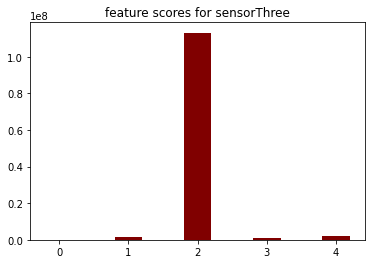

In [11]:
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_scaled2 = scaler2.transform(X_train)
fs = SelectKBest(score_func = f_regression, k = 'all')
fs.fit(X_train_scaled2, Y_train[:,0])
X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)
for i in range(len(fs.scores_)):
    print(i, fs.scores_[i])
plt.bar(range(0,5), fs.scores_, color = 'maroon', width = 0.4)
plt.title('feature scores for sensorThree')
plt.show()

In [19]:
fs = SelectKBest(score_func = f_regression, k = 'all')
fs.fit(X_train, Y_train[:,1])
X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)
for i in range(len(fs.scores_)):
    print(i, fs.scores_[i])

0 675.7527975414735
1 1349400.730967399
2 410750907.15434676
3 1075831.9919891239
4 2140592.887917833


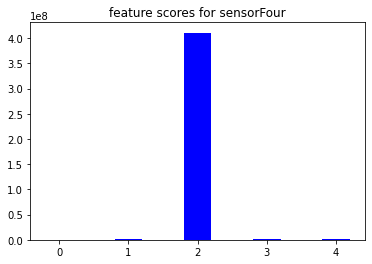

In [20]:
plt.bar(range(0,5), fs.scores_, color = 'blue', width = 0.4)
plt.title('feature scores for sensorFour')
plt.show()


In [ ]:
from sklearn.feature_selection import mutual_info_regression
fs2 = SelectKBest(score_func = mutual_info_regression, k = 'all')
fs2.fit(X_train, Y_train[:,1])
X_train_fs2 = fs2.transform(X_train)
X_test_fs2 = fs2.transform(X_test)
for i in range(len(fs.scores_)):
    print(i, fs.scores_[i])
plt.bar(range(0,5), fs2.scores_, color = 'blue', width = 0.4)
plt.show()
# Too lengthy computation (skip this)

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
sensorFive = data[['sensorFive']].values
s5_train, s5_test, y_train, y_test = train_test_split(sensorFive, Y_val, test_size = 0.33)
regr1 = LinearRegression()
regr1.fit(s5_train, y_train)
print(regr1.score(s5_test, y_test))
y_pred = regr1.predict(s5_test)
print(metrics.mean_squared_error(y_pred, y_test))
print(metrics.mean_absolute_error(y_pred, y_test))

0.9823334065676137
57.19189876948069
4.320168956750745


In [25]:
from sklearn import preprocessing
dataNormalized = preprocessing.normalize(X_train)
testDataNormalized = preprocessing.normalize(X_test)
regr2 = LinearRegression()
regr2.fit(dataNormalized, Y_train)
print(regr2.score(testDataNormalized, Y_test))
# Worse scores on normalizing 

-6.857990902164879e-06


In [21]:
from sklearn.model_selection import cross_val_score
regr = LinearRegression()
scores = cross_val_score(regr, X_val, Y_val, cv = 5)

In [23]:
print(scores)
print(scores.mean())
print(scores.var())

[0.98384083 0.97834294 0.97964676 0.98165888 0.83562806]
0.951823492362416
0.0033788109642970132
